**Sahaj Shrestha**  
MSCS 634-M40 Advanced Big Data and Data Mining
Lab Assignment 2: KNN vs RNN Algorithms

In [6]:
from sklearn import datasets
dir(datasets)

['__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_arff_parser',
 '_base',
 '_california_housing',
 '_covtype',
 '_kddcup99',
 '_lfw',
 '_olivetti_faces',
 '_openml',
 '_rcv1',
 '_samples_generator',
 '_species_distributions',
 '_svmlight_format_fast',
 '_svmlight_format_io',
 '_twenty_newsgroups',
 'clear_data_home',
 'data',
 'descr',
 'dump_svmlight_file',
 'fetch_20newsgroups',
 'fetch_20newsgroups_vectorized',
 'fetch_california_housing',
 'fetch_covtype',
 'fetch_file',
 'fetch_kddcup99',
 'fetch_lfw_pairs',
 'fetch_lfw_people',
 'fetch_olivetti_faces',
 'fetch_openml',
 'fetch_rcv1',
 'fetch_species_distributions',
 'get_data_home',
 'load_breast_cancer',
 'load_diabetes',
 'load_digits',
 'load_files',
 'load_iris',
 'load_linnerud',
 'load_sample_image',
 'load_sample_images',
 'load_svmlight_file',
 'load_svmlight_files',
 'load_wine',
 'make_biclusters',
 'make_blobs',


In [1]:
# Import necessary libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
import pandas as pd

# Load the Wine dataset
wine = load_wine()
X = wine.data
y = wine.target

# Convert to DataFrame for better readability
df = pd.DataFrame(X, columns=wine.feature_names)
df['target'] = y

# Show first 5 rows
print(df.head())

# Check class distribution
print("Class Distribution:")
print(df['target'].value_counts())


   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  target  
0          

In [2]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Try different values of k
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k}, Accuracy={acc:.4f}")


K=1, Accuracy=0.7778
K=5, Accuracy=0.7222
K=11, Accuracy=0.7500
K=15, Accuracy=0.7500
K=21, Accuracy=0.7778


In [4]:
from sklearn.neighbors import RadiusNeighborsClassifier

# Try different radius values
radius_values = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label='most_frequent')
    rnn.fit(X_train, y_train)
    y_pred = rnn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    rnn_accuracies.append(acc)
    print(f"Radius={radius}, Accuracy={acc:.4f}")


Radius=350, Accuracy=0.7500
Radius=400, Accuracy=0.7222
Radius=450, Accuracy=0.7222
Radius=500, Accuracy=0.7222
Radius=550, Accuracy=0.7222
Radius=600, Accuracy=0.7222


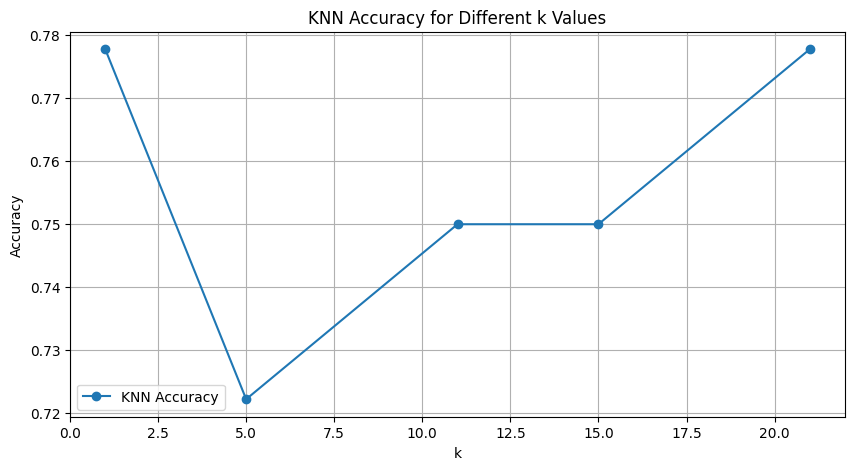

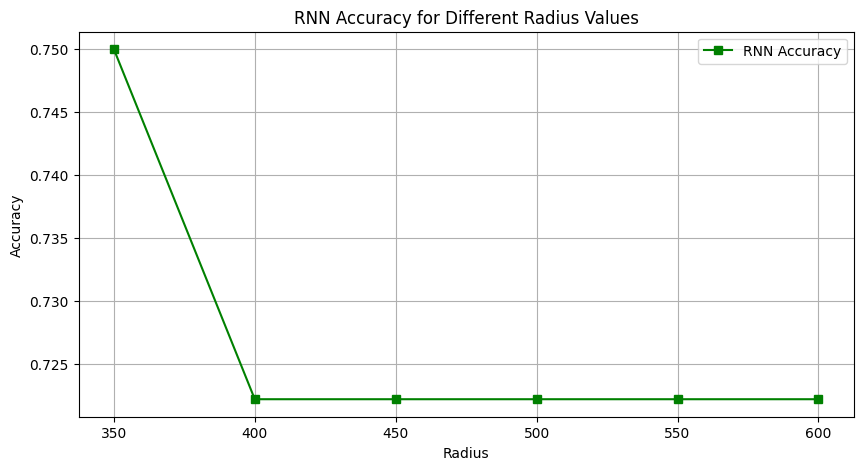

In [5]:
import matplotlib.pyplot as plt

# Plot KNN results
plt.figure(figsize=(10, 5))
plt.plot(k_values, knn_accuracies, marker='o', label='KNN Accuracy')
plt.title("KNN Accuracy for Different k Values")
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()

# Plot RNN results
plt.figure(figsize=(10, 5))
plt.plot(radius_values, rnn_accuracies, marker='s', color='green', label='RNN Accuracy')
plt.title("RNN Accuracy for Different Radius Values")
plt.xlabel("Radius")
plt.ylabel("Accuracy")
plt.grid(True)
plt.legend()
plt.show()
